In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from dateutil.parser import parse

https://open.fda.gov/apis/food/enforcement/



In [19]:
# Performing a GET Request and saving the 
# API's response within a variable

with open('food.json') as json_file:
    data = json.load(json_file)


#Importing to dataframe

TotalRecall = pd.DataFrame(data['results'])

group = TotalRecall.groupby(['state'])

count = group.count()


Atilla


In [20]:
start = pd.to_datetime(TotalRecall['recall_initiation_date'],format= '%Y%m%d', errors='ignore').values.astype('datetime64[D]')
end = pd.to_datetime(TotalRecall['termination_date'],format= '%Y%m%d', errors='ignore').values.astype('datetime64[D]')
notify = pd.to_datetime(TotalRecall['report_date'],format= '%Y%m%d', errors='ignore').values.astype('datetime64[D]')
TotalRecall['recall duration1'] = (end - start)
TotalRecall['recall duration'] = TotalRecall['recall duration1'].astype(np.int64) / 86400000000000

TotalRecall = TotalRecall.dropna(subset=['termination_date','recall duration1'])
TotalRecall = TotalRecall[TotalRecall['recall duration'] < 5000]
Letter = TotalRecall[TotalRecall["initial_firm_notification"] == "Letter"]["recall duration"]
Email = TotalRecall[TotalRecall["initial_firm_notification"] == "E-Mail"]["recall duration"]
Press = TotalRecall[TotalRecall["initial_firm_notification"] == "Press Release"]["recall duration"]
Phone = TotalRecall[TotalRecall["initial_firm_notification"] == "Telephone"]["recall duration"]
Visit = TotalRecall[TotalRecall["initial_firm_notification"] == "Visit"]["recall duration"]
Other = TotalRecall[TotalRecall["initial_firm_notification"] == "Other"]["recall duration"]
Fax = TotalRecall[TotalRecall["initial_firm_notification"] == "FAX"]["recall duration"]


#TotalRecall.sort_values('recall duration', ascending=False)

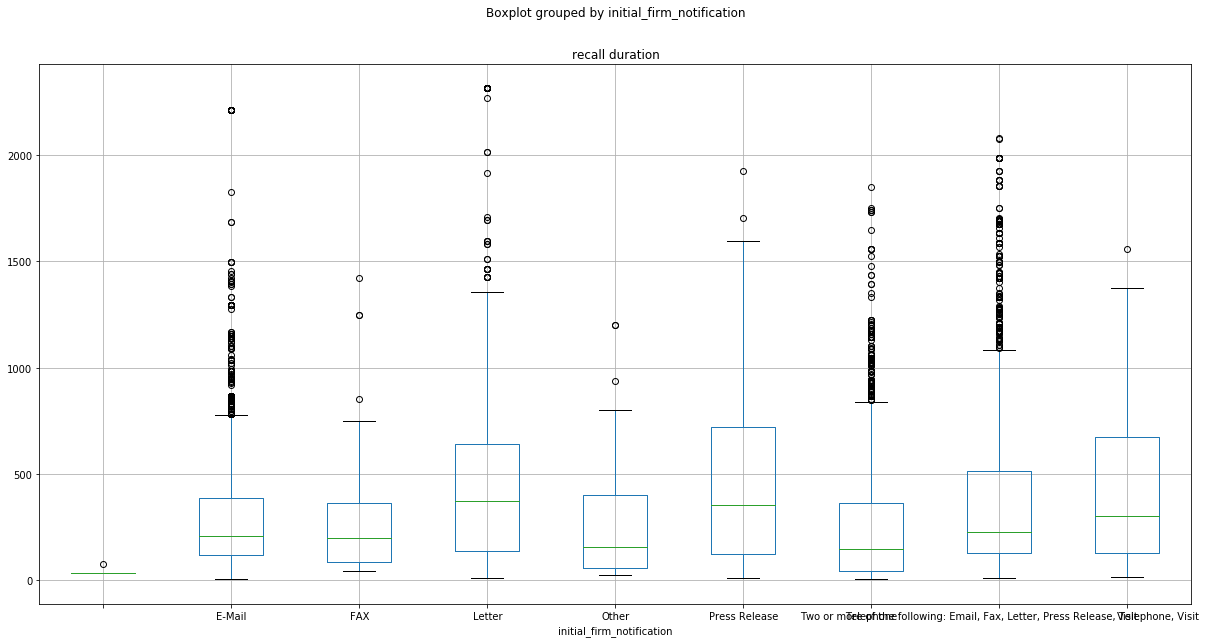

In [21]:
TotalRecall.boxplot("recall duration", by = "initial_firm_notification", figsize = (20,10))

Shuo

Alfredo

Brenda